# Importing and Loading packages

### First, we need to install the package "here" so that we can call all mudules without thinking about path. 

### Then, we can load and install the rest of the packages from the file module.R 


In [3]:
#install.packages("here")
library(here, help, pos = 2, lib.loc = NULL)
source(here('Modules','modules.R'))
#install_all_packages()
load_library_packages()

Warning message:
"package 'here' was built under R version 4.1.1"
here() starts at C:/Users/maria/Desktop/Programacao/IC/projetos/Barreiras-e-Facilitadores

Warning message:
"package 'ggplot2' was built under R version 4.1.1"
Warning message:
"package 'cowplot' was built under R version 4.1.1"
Warning message:
"package 'randomForest' was built under R version 4.1.1"
randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin


Warning message:
"package 'caret' was built under R version 4.1.1"
Carregando pacotes exigidos: lattice

Warning message:
"package 'lattice' was built under R version 4.1.1"
Warning message:
"package 'rpart.plot' was built under R version 4.1.1"
Carregando pacotes exigidos: rpart

Warning message:
"package 'readxl' was built under R version 4.1.1"
Warning message:
"package 'e1071' was built under R version 4.1.1"
Warning message:
"package 'Augmen

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

[[13]]
[1] TRUE

[[14]]
[1] TRUE

[[15]]
[1] TRUE

[[16]]
[1] TRUE

[[17]]
[1] TRUE

[[18]]
[1] TRUE

[[19]]
[1] TRUE

[[20]]
[1] TRUE

[[21]]
[1] TRUE

[[22]]
[1] TRUE

[[23]]
[1] TRUE

[[24]]
[1] TRUE

[[25]]
[1] TRUE

[[26]]
[1] TRUE

[[27]]
[1] TRUE

[[28]]
[1] TRUE

# Importing and Exploring the Dataset

In [4]:
before_dataset <- read_excel(path = here('Data','before_pa.xlsx'))
before_dataset <- data.frame(before_dataset)
dim(before_dataset)
unique(sapply(before_dataset, class))
head(before_dataset)


[1] 1255   77

[1] "numeric"

,sex,age_range,martialStatus,state,zone,co.resident_range,rooms_range,income_range,scholarity,diabetes,...,PA_easiness_others_before,PA_barriers_before_time_family_responsabilities,PA_barriers_before_tiredness,PA_barriers_before_location_distance,PA_barriers_before_money,PA_barriers_before_time_convenience,PA_barriers_before_hard_task,PA_barriers_before_interest,PA_barriers_before_none,PA_practice_during
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,2,1,25,2,1,1,4,4,0,...,0,0,0,0,0,1,0,0,0,1
2,2,3,1,21,1,2,3,6,4,0,...,0,0,1,0,0,0,0,0,0,0
3,1,3,1,21,1,2,2,5,3,0,...,0,0,0,0,1,0,0,0,0,0
4,1,3,1,21,1,1,1,3,4,0,...,0,0,0,0,0,1,0,0,0,0
5,1,2,2,25,2,2,2,6,4,0,...,0,1,0,0,0,0,0,0,0,0
6,2,3,2,21,1,2,2,6,6,0,...,0,1,0,0,0,0,0,0,0,0


# Adding new Columns

In [5]:
sports = c('running_before','hiking_before','cycling_before','muscle_training_before',
'soccer_before','tennis_before','volleyball_before','basketball_before',
'swimming_before','surfing_before','yoga_before','pilates_before',
'fighting_before','other_sports_before')
    
before_dataset[, "pa_number_before"] = rowSums(before_dataset[, sports])

# Treating missing data

### As the dataset had little missing data, we chose to omit them

In [6]:
before_dataset <- before_dataset[complete.cases(before_dataset), ]
dim(before_dataset)


[1] 1242   78

# Treating variables type

In [7]:
before_dataset$PA_practice_before[before_dataset$PA_practice_before == 0] <- "practice"
before_dataset$PA_practice_before[before_dataset$PA_practice_before == 1] <- "dont_practice"
before_dataset$PA_practice_during[before_dataset$PA_practice_during == 0] <- "practice"
before_dataset$PA_practice_during[before_dataset$PA_practice_during == 1] <- "dont_practice"

before_dataset$PA_intensity_before[before_dataset$PA_intensity_before == 4] <- 0
before_dataset$PA_duration_before[before_dataset$PA_duration_before == 5] <- 0


In [8]:
numeric_columns = c(
    'age_range',
    'rooms_range',
    'income_range',
    'scholarity',
    'sedentary_time_range_before',
    'co.resident_range',
    "PA_weekly_frequency_before",
    'PA_intensity_before',
    'PA_duration_before',
    "pa_number_before"
)
columns = names(before_dataset)
categorical_columns <- columns[!columns %in% numeric_columns]


before_dataset[, categorical_columns] <- lapply(before_dataset[, categorical_columns], as.factor)
before_dataset[, numeric_columns] <- lapply(before_dataset[, numeric_columns], as.integer)


before_dataset[1, 2] < before_dataset[2, 2] 

head(before_dataset[, numeric_columns])


[1] TRUE

,age_range,rooms_range,income_range,scholarity,sedentary_time_range_before,co.resident_range,PA_weekly_frequency_before,PA_intensity_before,PA_duration_before,pa_number_before
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2,1,4,4,4,1,4,1,2,1
2,3,3,6,4,3,2,3,2,3,4
3,3,2,5,3,1,2,2,3,2,2
4,3,1,3,4,2,1,4,3,3,2
5,2,2,6,4,4,2,4,3,3,2
6,3,2,6,6,2,2,3,2,2,3


In [9]:
lapply(before_dataset, levels)[c("DA", "DP")]
before_dataset <- subset(before_dataset, select = -c(DA, DP, state, zone))

$DA
[1] "0"

$DP
[1] "0"

# Sanity Check

### More then one column have the class "dont_practice", we need to check if they agree.

In [10]:
table(before_dataset[, c("PA_practice_before", "PA_duration_before")])
table(before_dataset[, c("PA_practice_before", "PA_intensity_before")])
table(before_dataset[, c("PA_practice_before", "PA_weekly_frequency_before")])
table(before_dataset[, c("PA_practice_before", "pa_number_before")])


                  PA_duration_before
PA_practice_before   0   1   2   3   4
     dont_practice 131   8   4   2   0
     practice        4  60 654 324  55

                  PA_intensity_before
PA_practice_before   0   1   2   3
     dont_practice 131  14   0   0
     practice        2 148 590 357

                  PA_weekly_frequency_before
PA_practice_before   1   2   3   4
     dont_practice 144   0   1   0
     practice        2 424 473 198

                  pa_number_before
PA_practice_before   0   1   2   3   4   5   6   7   9  14
     dont_practice 144   1   0   0   0   0   0   0   0   0
     practice        0 388 364 217  95  22   4   5   1   1

In [11]:
differ_dp <- ( before_dataset$PA_duration_before != 0 
                | before_dataset$PA_intensity_before != 0 
                | before_dataset$PA_weekly_frequency_before != 1 
                | before_dataset$pa_number_before != 0
            ) 
strange_dp <- before_dataset$PA_practice_before == "dont_practice" & differ_dp 

table(strange_dp)
# before_dataset <- before_dataset[!strange_dp,]

strange_dp
FALSE  TRUE 
 1227    15 

In [12]:
differ_p <- (   before_dataset$PA_duration_before == 0 
                | before_dataset$PA_intensity_before == 0 
                | before_dataset$PA_weekly_frequency_before == 1
                | before_dataset$pa_number_before == 0
            )
strange_p <- before_dataset$PA_practice_before == "practice" & differ_p
table(strange_p)
# before_dataset <- before_dataset[!strange_p,]


strange_p
FALSE  TRUE 
 1236     6 

### We found out that some columns have bias

# Unsupervised Learning

In [13]:
before_dataset_copy <- before_dataset
before_dataset_copy[, "strange_dp"] <- strange_dp
before_dataset_copy[, "strange_p"] <- strange_p
has_tag_depression <- before_dataset$TAG == "1" | before_dataset$depression  == "1" 
before_dataset_copy[, "has_tag_depression"] <- has_tag_depression

dummy <- dummyVars(" ~ .", data=before_dataset)
encoded_dataset <- data.frame(predict(dummy, newdata = before_dataset)) 

## PCA

In [14]:
encoded_dataset.pca <- prcomp(encoded_dataset , center = TRUE,scale. = TRUE)
summary(encoded_dataset.pca) 

Importance of components:
                           PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.93882 2.28870 2.27467 2.13523 1.95841 1.91904 1.89626
Proportion of Variance 0.05998 0.03638 0.03593 0.03166 0.02663 0.02557 0.02497
Cumulative Proportion  0.05998 0.09635 0.13228 0.16395 0.19058 0.21615 0.24113
                           PC8     PC9    PC10    PC11    PC12   PC13    PC14
Standard deviation     1.81572 1.77938 1.73941 1.70716 1.66443 1.6451 1.60646
Proportion of Variance 0.02289 0.02199 0.02101 0.02024 0.01924 0.0188 0.01792
Cumulative Proportion  0.26402 0.28601 0.30702 0.32726 0.34650 0.3653 0.38321
                          PC15    PC16    PC17    PC18    PC19  PC20    PC21
Standard deviation     1.58789 1.58254 1.56073 1.54877 1.53443 1.518 1.49757
Proportion of Variance 0.01751 0.01739 0.01692 0.01666 0.01635 0.016 0.01557
Cumulative Proportion  0.40072 0.41811 0.43503 0.45169 0.46804 0.484 0.49961
                          PC22    PC23

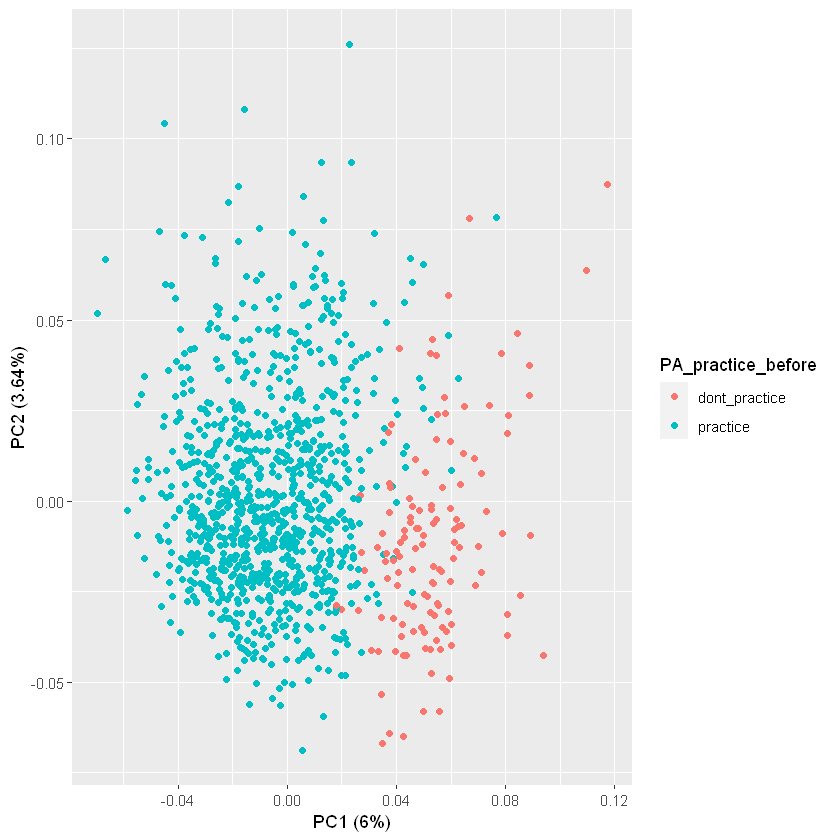

In [15]:
autoplot(encoded_dataset.pca, colour="PA_practice_before", data=before_dataset)

## TSNE

In [16]:
tsne <- Rtsne(encoded_dataset, dims = 2, perplexity=30, check_duplicates = FALSE, verbose=TRUE)

Performing PCA
Read the 1242 x 50 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.38 seconds (sparsity = 0.103546)!
Learning embedding...
Iteration 50: error is 71.395093 (50 iterations in 0.34 seconds)
Iteration 100: error is 71.312321 (50 iterations in 0.42 seconds)
Iteration 150: error is 70.786628 (50 iterations in 0.30 seconds)
Iteration 200: error is 70.786279 (50 iterations in 0.20 seconds)
Iteration 250: error is 70.786314 (50 iterations in 0.22 seconds)
Iteration 300: error is 2.165784 (50 iterations in 0.26 seconds)
Iteration 350: error is 1.958262 (50 iterations in 0.25 seconds)
Iteration 400: error is 1.873071 (50 iterations in 0.26 seconds)
Iteration 450: error is 1.832456 (50 iterations in 0.26 seconds)
Iteration 500: error is 1.808934 (50 iterations in 0.28 seconds)
Iteration 550: error is 1.793292 (50 iterations in 0.29 seconds)
Iteration 60

### Practive before x dont Practice before

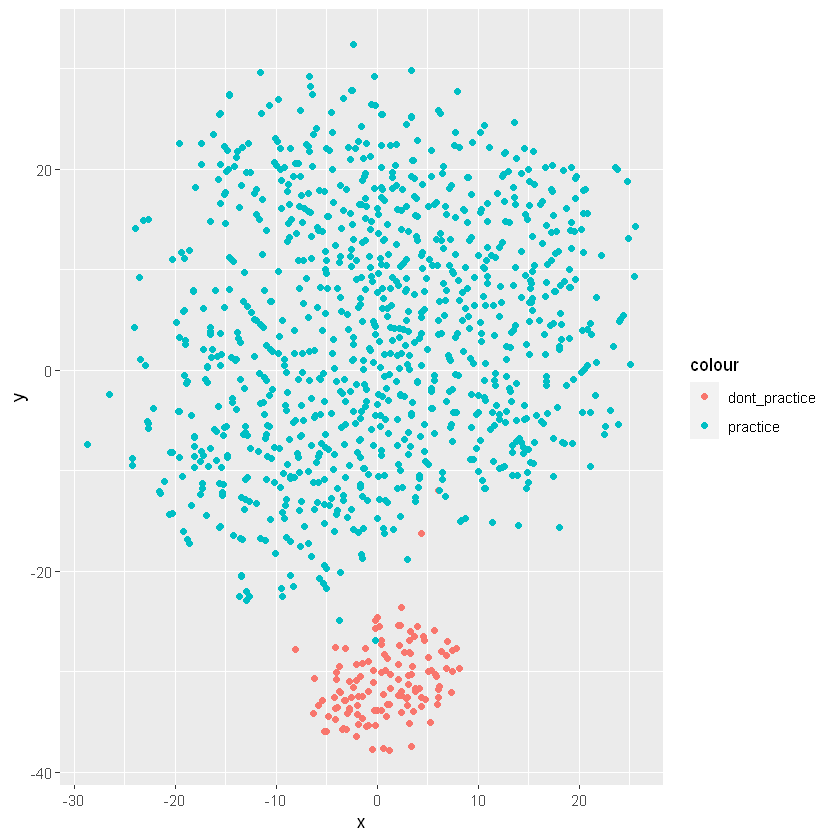

In [17]:
metadata <- data.frame(sample_id = rownames(before_dataset_copy),
                       colour = before_dataset_copy$PA_practice_before)
tsne_df <- data.frame(
    x = tsne$Y[,1],
    y = tsne$Y[,2],
    colour = metadata$colour)

ggplot(tsne_df, aes(x, y, colour = colour)) + geom_point()

### Strange dont practice

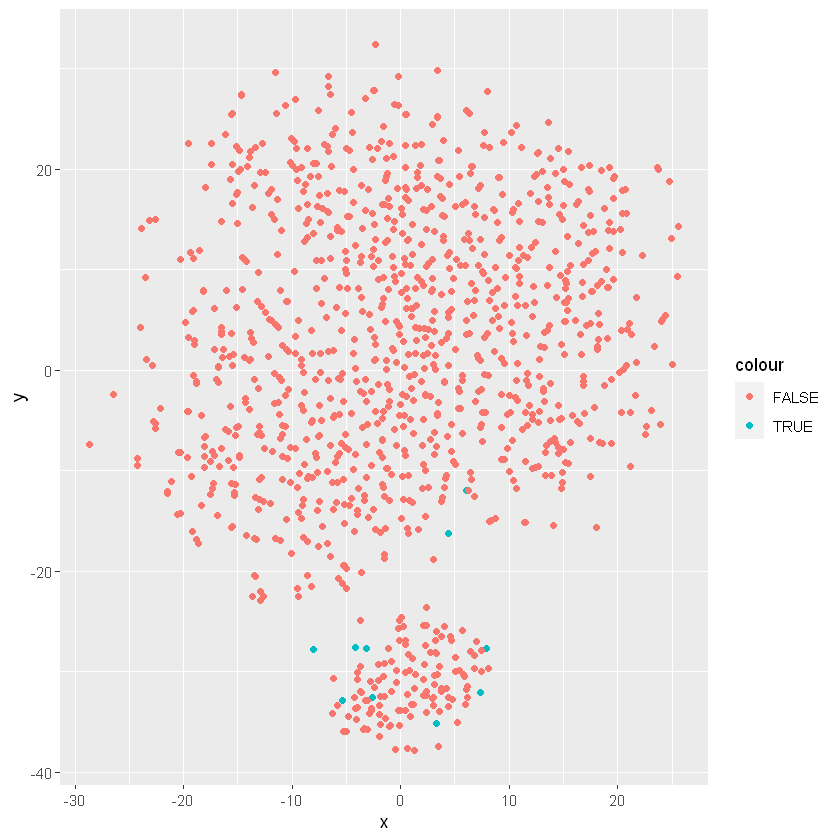

In [18]:
metadata <- data.frame(sample_id = rownames(before_dataset_copy),
                       colour = before_dataset_copy$strange_dp)
tsne_df <- data.frame(
    x = tsne$Y[,1],
    y = tsne$Y[,2],
    colour = metadata$colour)

ggplot(tsne_df, aes(x, y, colour = colour)) + geom_point()

### Strange practice

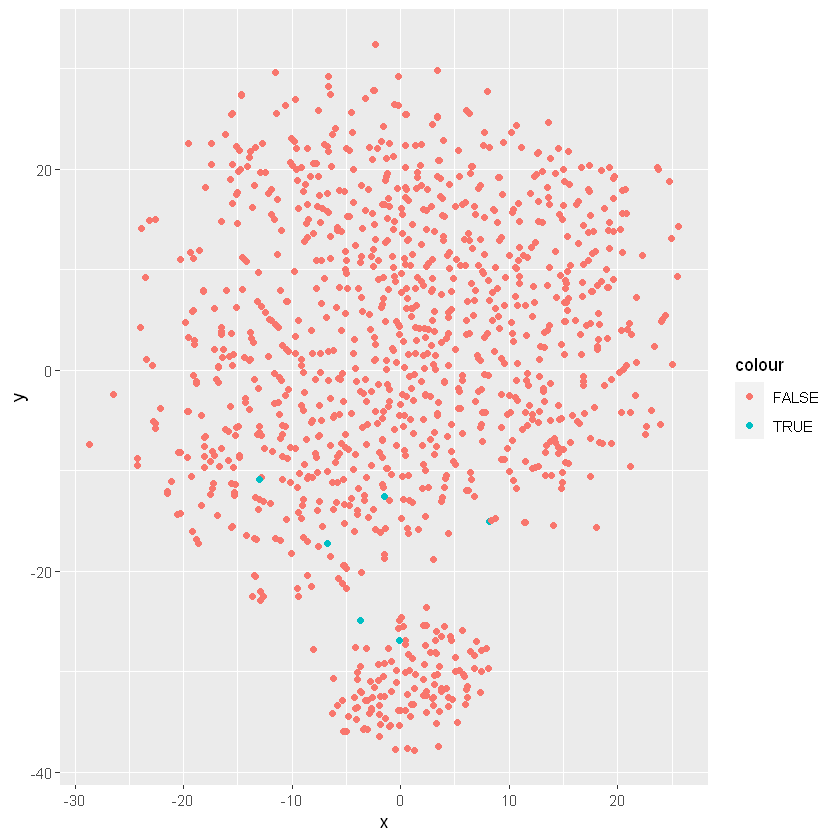

In [36]:
metadata <- data.frame(sample_id = rownames(before_dataset_copy),
                       colour = before_dataset_copy$strange_p)
tsne_df <- data.frame(
    x = tsne$Y[,1],
    y = tsne$Y[,2],
    colour = metadata$colour)

ggplot(tsne_df, aes(x, y, colour = colour)) + geom_point()

### Has tag or depression

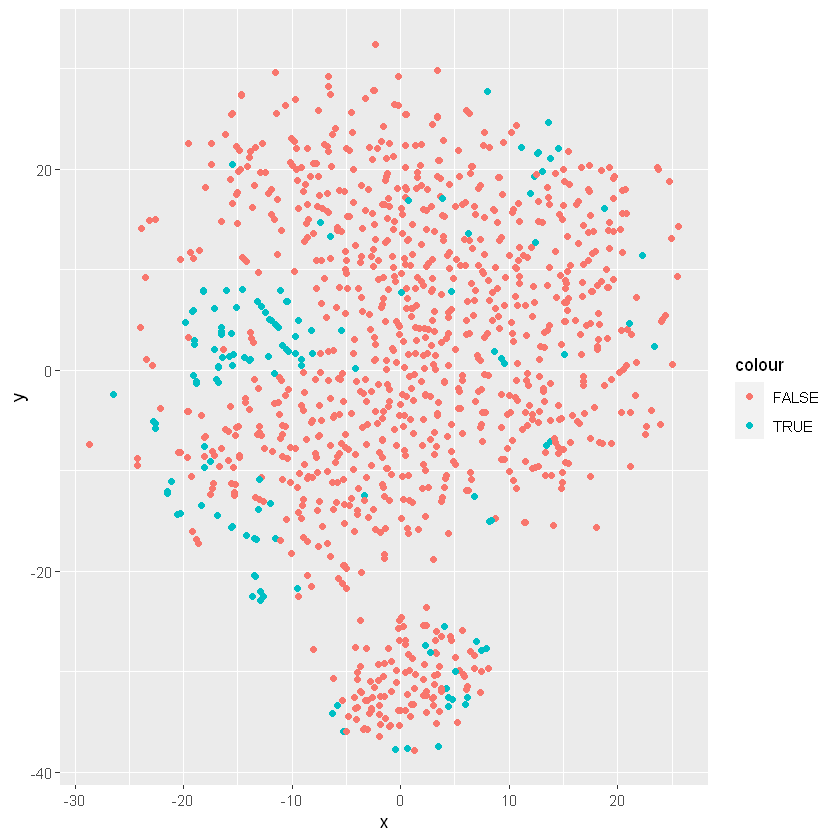

In [20]:
metadata <- data.frame(sample_id = rownames(before_dataset_copy),
                       colour = before_dataset_copy$has_tag_depression)
tsne_df <- data.frame(
    x = tsne$Y[,1],
    y = tsne$Y[,2],
    colour = metadata$colour)

ggplot(tsne_df, aes(x, y, colour = colour)) + geom_point()

# Decision Trees for people with and without Tag and depression

## Finding out the majority class


In [21]:
table(before_dataset[, "PA_practice_during"])


dont_practice      practice 
          346           896 

## Creating the dataset partition

In [38]:
set.seed(2)
lista_treino <- createDataPartition(before_dataset$PA_practice_during, p=0.7, list=FALSE)
treino <- before_dataset[lista_treino,]
teste <- before_dataset[-lista_treino,]



## Applying augmentation into the training set

In [39]:
treino.aug <- data_augmentation(
    train_data=treino,
    yname="PA_practice_during",
    maj_class = "practice",
    min_classes = c("dont_practice"),
    ycol=match("PA_practice_during",names(before_dataset))
)

table(treino.aug[, "PA_practice_during"])



dont_practice      practice 
          627           628 

## Kappa metric without augmentation

Confusion Matrix and Statistics

               Reference
Prediction      dont_practice practice
  dont_practice            40       31
  practice                 63      237
                                          
               Accuracy : 0.7466          
                 95% CI : (0.6992, 0.7901)
    No Information Rate : 0.7224          
    P-Value [Acc > NIR] : 0.162248        
                                          
                  Kappa : 0.3015          
                                          
 Mcnemar's Test P-Value : 0.001387        
                                          
            Sensitivity : 0.3883          
            Specificity : 0.8843          
         Pos Pred Value : 0.5634          
         Neg Pred Value : 0.7900          
             Prevalence : 0.2776          
         Detection Rate : 0.1078          
   Detection Prevalence : 0.1914          
      Balanced Accuracy : 0.6363          
                                          
       '

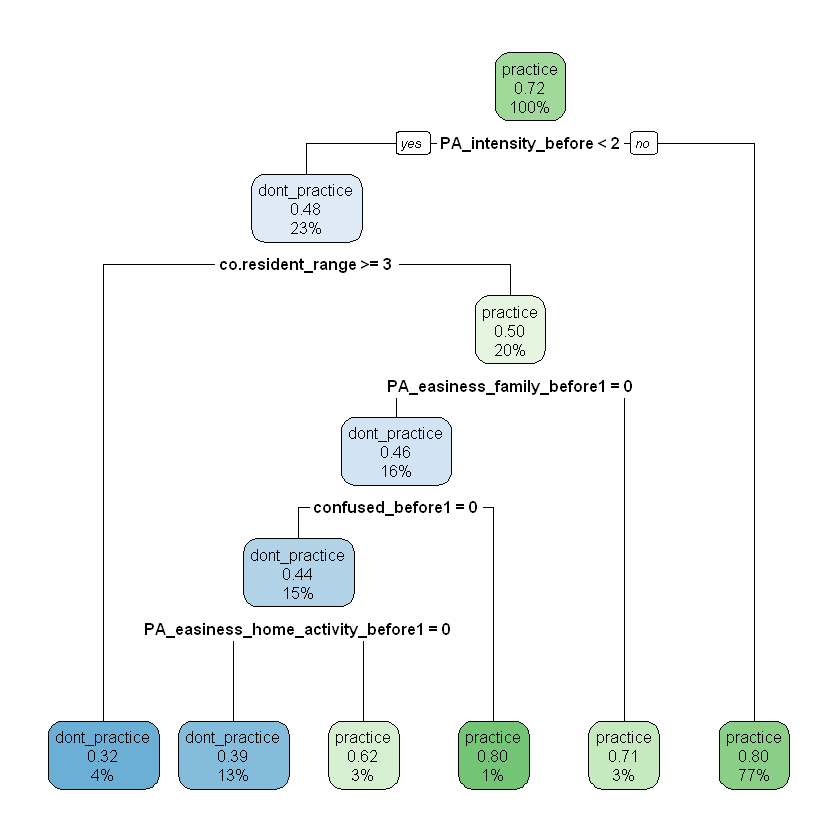

In [60]:
model <- fit_model(
    model_method="rpart",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv"),
    train_data = treino,
    test_data=teste,
    yname="PA_practice_during",
    length = 3
)
print(model$matrix)
# print(model$result)
rpart.plot(model$result$finalModel)



In [59]:
print(model$result)

CART 

871 samples
 73 predictor
  2 classes: 'dont_practice', 'practice' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 784, 784, 784, 784, 784, 784, ... 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa     
  0.02057613  0.7072884  0.14031890
  0.02469136  0.7106975  0.15258256
  0.04115226  0.7083986  0.07859955

Kappa was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.02469136.


## Kappa metric with augmentation

Confusion Matrix and Statistics

               Reference
Prediction      dont_practice practice
  dont_practice            76      117
  practice                 27      151
                                          
               Accuracy : 0.6119          
                 95% CI : (0.5602, 0.6617)
    No Information Rate : 0.7224          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.2374          
                                          
 Mcnemar's Test P-Value : 1.201e-13       
                                          
            Sensitivity : 0.7379          
            Specificity : 0.5634          
         Pos Pred Value : 0.3938          
         Neg Pred Value : 0.8483          
             Prevalence : 0.2776          
         Detection Rate : 0.2049          
   Detection Prevalence : 0.5202          
      Balanced Accuracy : 0.6506          
                                          
       '

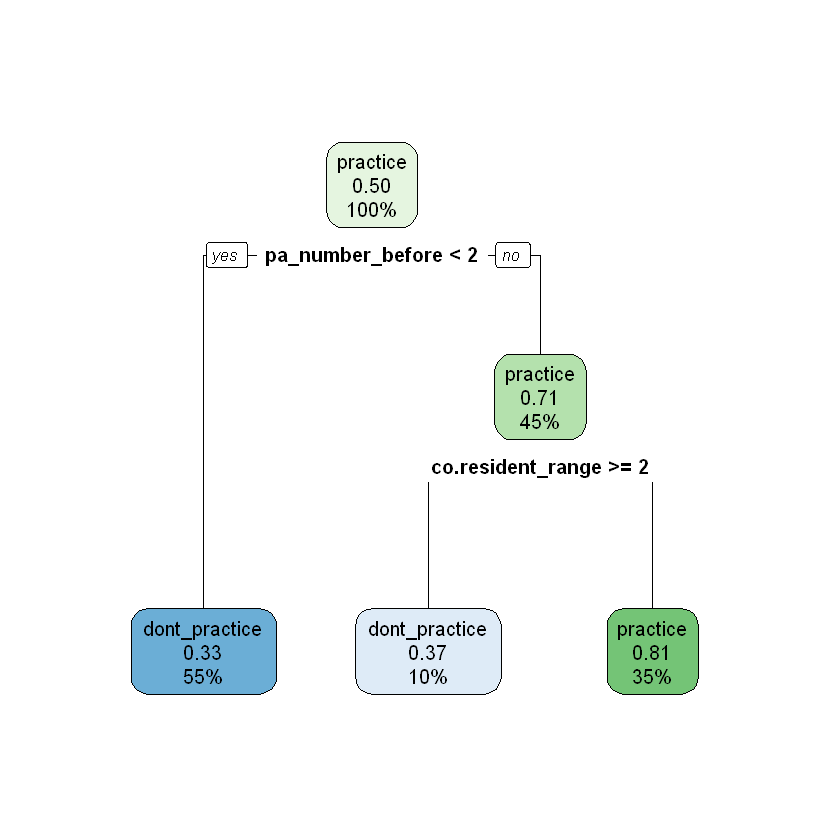

In [41]:
model <- fit_model(
    model_method="rpart",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv"),
    train_data = treino.aug,
    test_data=teste,
    yname="PA_practice_during",
    length=3
)
print(model$matrix)
rpart.plot(model$result$finalModel)

In [26]:
print(model$result)

CART 

1255 samples
  73 predictor
   2 classes: 'dont_practice', 'practice' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 1255, 1255, 1255, 1255, 1255, 1255, ... 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa    
  0.04625199  0.7082148  0.4171885
  0.05263158  0.7000215  0.4009198
  0.37799043  0.5676777  0.1512966

Kappa was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.04625199.


## F-beta score without augmentation

In [27]:
fbeta <- function (data, lev=NULL, model = NULL){
    fb_val <- FBeta_Score(data$obs, data$pred, positive="practice", beta = 0.1)
    c(FB = fb_val)
}

Confusion Matrix and Statistics

               Reference
Prediction      dont_practice practice
  dont_practice            35       23
  practice                 68      245
                                          
               Accuracy : 0.7547          
                 95% CI : (0.7077, 0.7977)
    No Information Rate : 0.7224          
    P-Value [Acc > NIR] : 0.09004         
                                          
                  Kappa : 0.2935          
                                          
 Mcnemar's Test P-Value : 3.979e-06       
                                          
            Sensitivity : 0.33981         
            Specificity : 0.91418         
         Pos Pred Value : 0.60345         
         Neg Pred Value : 0.78275         
             Prevalence : 0.27763         
         Detection Rate : 0.09434         
   Detection Prevalence : 0.15633         
      Balanced Accuracy : 0.62699         
                                          
       '

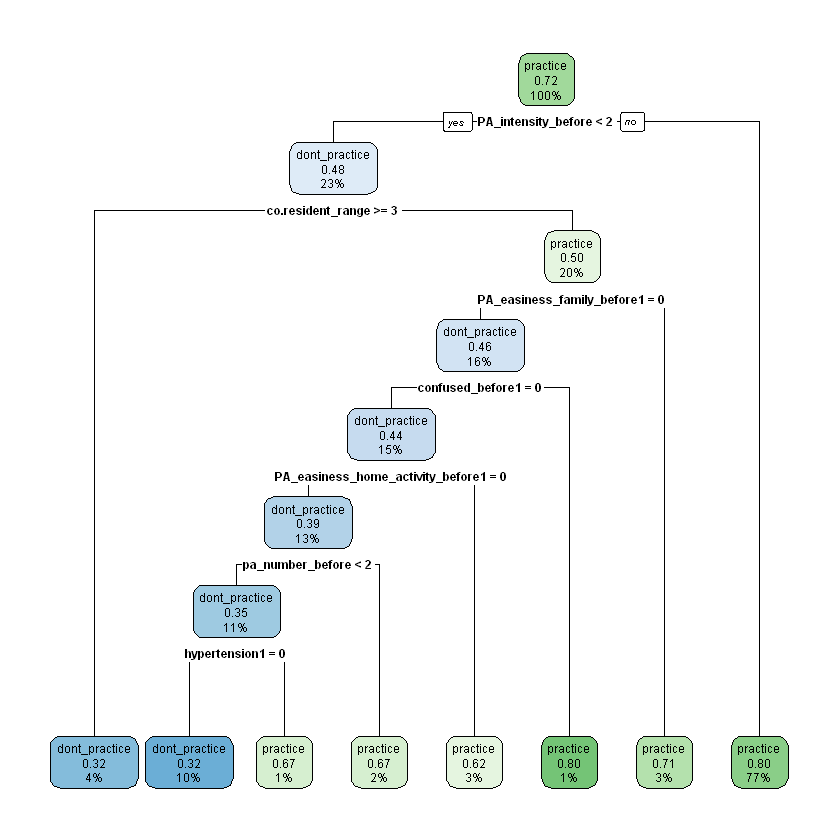

In [28]:
model <- fit_model(
    model_method="rpart",
    model_metric="FB",
    trControl_func = trainControl(method = "boot", summaryFunction=fbeta, classProbs = TRUE),
    train_data = treino,
    test_data=teste,
    yname="PA_practice_during"
)
print(model$matrix)
rpart.plot(model$result$finalModel)

In [29]:
gini = varImp(model$result$finalModel)
#gini[order(gini)]
head(gini, 20)
# plot(varImp(model$result$finalModel), main="Variables Importance - Decision Tree") 

,Overall
,<dbl>
anxious_before1,2.111111
co.resident_range,1.707012
confused_before1,4.338105
hypertension1,4.942340
optimistic_before1,1.502500
other_sports_before1,4.627577
PA_barriers_before_time_convenience1,1.065756
PA_barriers_before_tiredness1,1.058610
PA_duration_before,19.932053


## F-beta score with augmentation

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


Confusion Matrix and Statistics

               Reference
Prediction      dont_practice practice
  dont_practice            48       47
  practice                 55      221
                                          
               Accuracy : 0.7251          
                 95% CI : (0.6766, 0.7699)
    No Information Rate : 0.7224          
    P-Value [Acc > NIR] : 0.4803          
                                          
                  Kappa : 0.2978          
                                          
 Mcnemar's Test P-Value : 0.4882          
                                          
            Sensitivity : 0.4660          
            Specificity : 0.8246          
         Pos Pred Value : 0.5053          
         Neg Pred Value : 0.8007          
             Prevalence : 0.2776          
         Detection Rate : 0.1294          
   Detection Prevalence : 0.2561          
      Balanced Accuracy : 0.6453          
                                          
       '

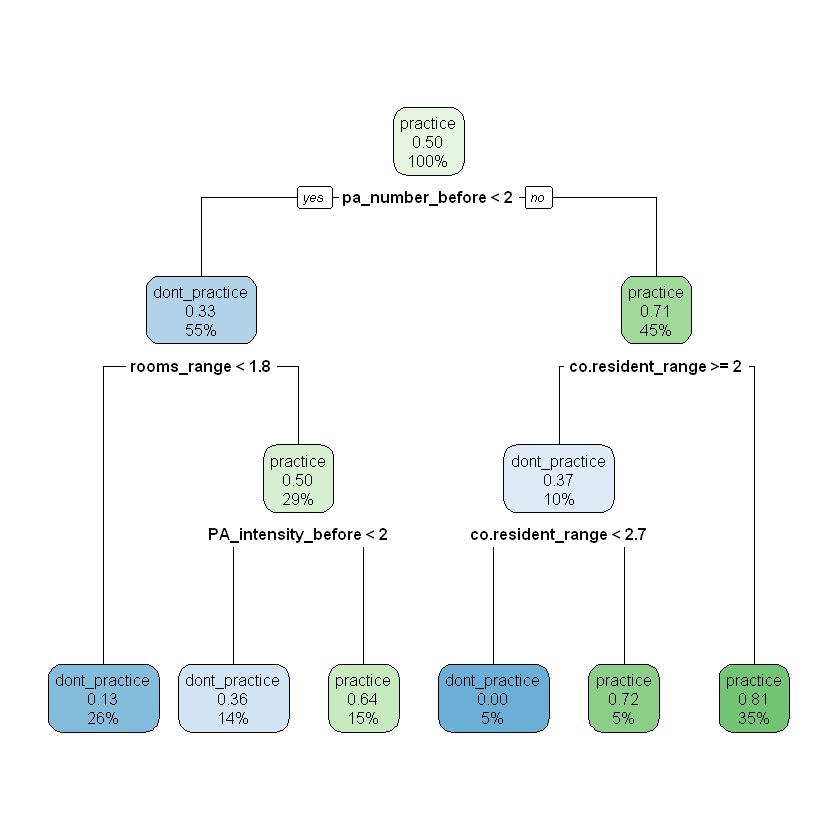

In [30]:
model <- fit_model(
    model_method="rpart",
    model_metric="FB",
    trControl_func = trainControl(method = "boot", summaryFunction=fbeta, classProbs = TRUE),
    train_data = treino.aug,
    test_data=teste,
    yname="PA_practice_during"
)
print(model$matrix)
rpart.plot(model$result$finalModel)

# Decision tree for people with Tag or depression

## Filtering dataset and finding out the majority class


In [31]:
before_datase_disorders <- before_dataset[has_tag_depression, ]
before_datase_disorders <- subset(before_datase_disorders, select = -c(TAG, depression))

print(table(before_datase_disorders[, "PA_practice_during"]))
dim(before_datase_disorders)




dont_practice      practice 
           50            99 


[1] 149  72

## Creating the dataset partition

In [32]:
set.seed(2)
lista_treino <- createDataPartition(before_datase_disorders$PA_practice_during, p=0.7, list=FALSE)
treino <- before_datase_disorders[lista_treino,]
teste <- before_datase_disorders[-lista_treino,]



## Applying augmentation into the training set

In [33]:
treino.aug <- data_augmentation(
    train_data=treino,
    yname="PA_practice_during",
    maj_class = "practice",
    min_classes = c("dont_practice"),
    ycol=match("PA_practice_during",names(before_datase_disorders))
)

table(treino.aug[, "PA_practice_during"])



dont_practice      practice 
           69            70 

## Kappa metric without augmentation

Confusion Matrix and Statistics

               Reference
Prediction      dont_practice practice
  dont_practice             2        8
  practice                 13       21
                                          
               Accuracy : 0.5227          
                 95% CI : (0.3669, 0.6754)
    No Information Rate : 0.6591          
    P-Value [Acc > NIR] : 0.9787          
                                          
                  Kappa : -0.155          
                                          
 Mcnemar's Test P-Value : 0.3827          
                                          
            Sensitivity : 0.13333         
            Specificity : 0.72414         
         Pos Pred Value : 0.20000         
         Neg Pred Value : 0.61765         
             Prevalence : 0.34091         
         Detection Rate : 0.04545         
   Detection Prevalence : 0.22727         
      Balanced Accuracy : 0.42874         
                                          
       '

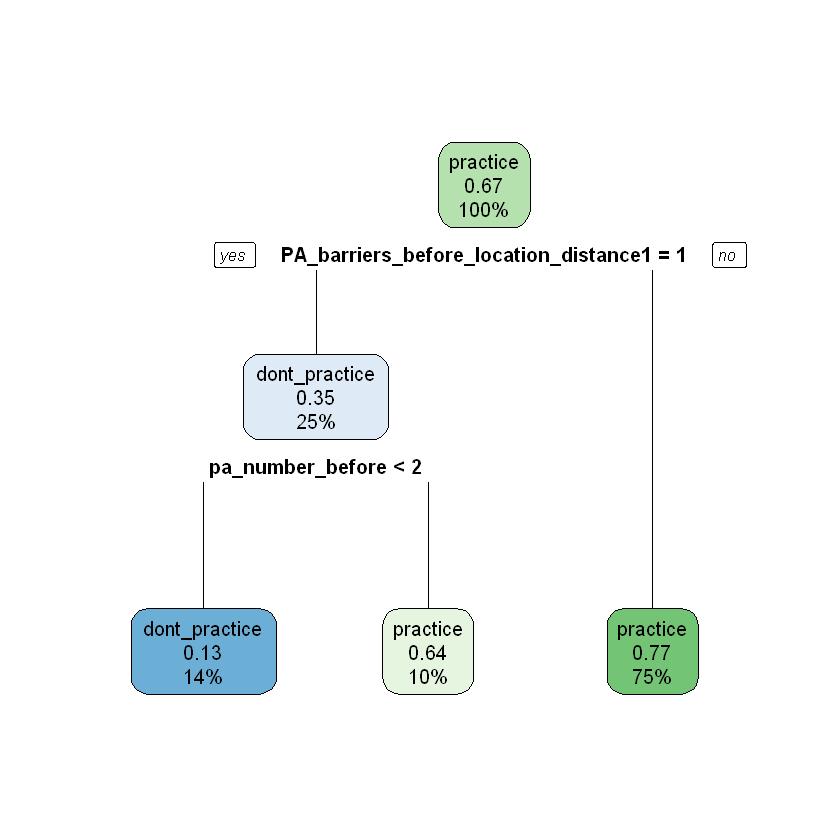

In [34]:
model <- fit_model(
    model_method="rpart",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv"),
    train_data = treino,
    test_data=teste,
    yname="PA_practice_during",
    length = 3
)
print(model$matrix)
# print(model$result)
rpart.plot(model$result$finalModel)



## Kappa metric with augmentation

Confusion Matrix and Statistics

               Reference
Prediction      dont_practice practice
  dont_practice             2        9
  practice                 13       20
                                          
               Accuracy : 0.5             
                 95% CI : (0.3456, 0.6544)
    No Information Rate : 0.6591          
    P-Value [Acc > NIR] : 0.9901          
                                          
                  Kappa : -0.1892         
                                          
 Mcnemar's Test P-Value : 0.5224          
                                          
            Sensitivity : 0.13333         
            Specificity : 0.68966         
         Pos Pred Value : 0.18182         
         Neg Pred Value : 0.60606         
             Prevalence : 0.34091         
         Detection Rate : 0.04545         
   Detection Prevalence : 0.25000         
      Balanced Accuracy : 0.41149         
                                          
       '

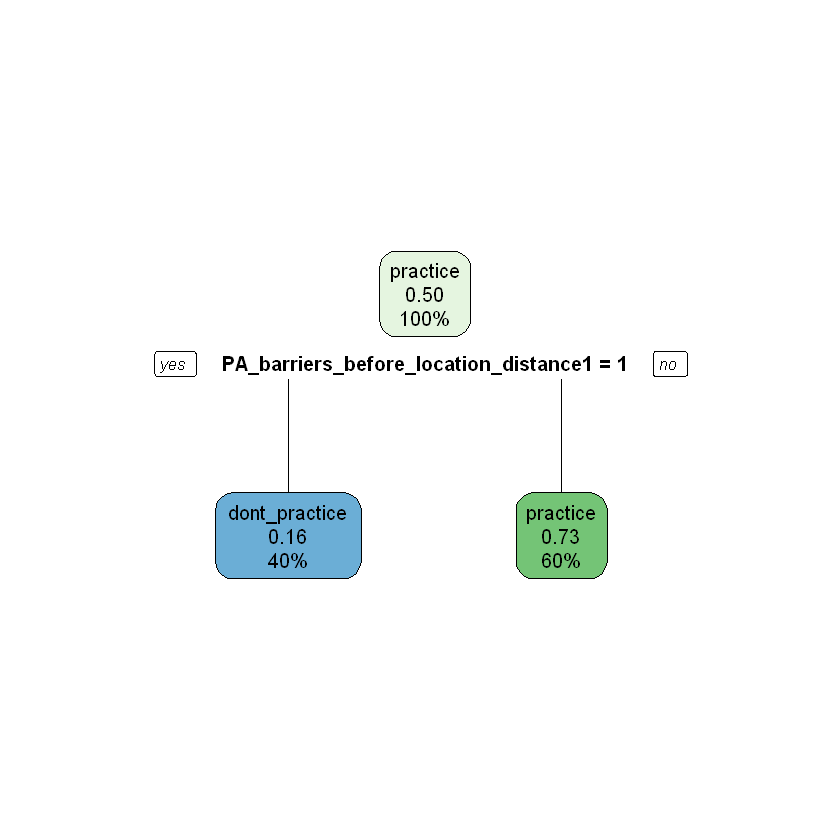

In [35]:
model <- fit_model(
    model_method="rpart",
    model_metric="Kappa",
    trControl_func = trainControl(method = "boot"),
    train_data = treino.aug,
    test_data=teste,
    yname="PA_practice_during",
    length=3
)
print(model$matrix)
rpart.plot(model$result$finalModel)